# K-Means
---
**Learning Objectives**

* In this Jupyter Notebook you will learn to code a K means method using Python.

* Main goals:
   1. Code a K-means method from scratch
   2. Visualize the results

* We will work using Google Colab, so you have to log in https://colab.research.google.com.

* Based on this [example](https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670).

## 1. K-means from scratch

**Introduction:**
* K-means is one of the simplest and most widely used clustering algorithms in machine learning. It aims to partition a dataset into
$k$ clusters by minimizing the distance between data points and their respective cluster centroids.

* This algorithm is an unsupervised learning method, meaning it works without labeled data.

**How It Works:**
1. Initialization: Randomly select $k$ initial cluster centroids.
2. Assignment Step: Assign each data point to the cluster with the nearest centroid.
3. Update Step: Recalculate the centroids based on the mean of all data points assigned to each cluster.
4. Repeat: Iterate the assignment and update steps until the centroids stabilize (or a maximum number of iterations is reached).


* We will implement the K-Means algorithm from scratch using Python. This will help us understand the underlying mechanics of the algorithm, including distance calculations, centroid updates, and stopping criteria.

## 1.1. Loading Python pacakges

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import random
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 1.2. Synthetic data genaration
---
We create synthetic data using the [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function and we visualiza the datasets using the scatter plots provided by [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

In [ ]:
n_clusters = 5
X_data, true_labels = make_blobs(n_samples=500, centers=n_clusters, random_state=42)
X_data = StandardScaler().fit_transform(X_data)

<div class="alert alert-block alert-success">
<b>Plot in 2D the dataset X_data</b>

Use the library <a href="https://seaborn.pydata.org">seaborn</a>  and the function <a href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn-scatterplot">scatterplot</a>.
    
</div>



In [ ]:
# Write your code for plotting here:



## 1.3. Functions
---
We will create two functions:
* euclidean_distance()
* k_means()

The names indicates clearly the goal of each fucntion.


Based on this [example](https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670).

### 1.3.1 euclidean_distance(point, data)
This function has two parameters to compute the Euclidean distance between a data point and a set of points.

<div class="alert alert-block alert-success">
<b>Write your function euclidean_distance() here</b>

    
</div>


In [ ]:
def euclidean_distance(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """


### 1.3.2. k_means(X_train, n_cluster,max_iter)
* This functions compute the clusters, by assigning to each data point its respective cluster
* Notice that we use different functions provided by different Python packages:
  * [random.uniforma(a,b)](https://docs.python.org/3/library/random.html) for generating a random number in the range [a,b].

* Test the random.uniform() function:

In [ ]:
import random
a = float(input("Write the first number"))
b = float(input("Write the second number"))
print("My random number between a=", a, "and b=", b, "is ", random.uniform(a,b))

Write the first number 5
Write the second number 5


My random number between a= 5.0 and b= 5.0 is  5.0


---
We also used the a list comprehension.

* It allows us to generate a new list by iterating over a sequence or range, optionally applying conditions or transformations
* The sintax is:

In [ ]:
n = int(input("n"))
l = []

for i in range(n):
    l.append(i**2)
print(l)



n 5


[0, 1, 4, 9, 16]


Instead of using a traditional loop, let's use a list comprehension:

(remember: newlist = [expression for item in iterable if condition == True])

<div class="alert alert-block alert-success">

<b>Example: Generating Squares</b>

Create a list of squares of numbers from 1 to $n$.
This is the traditional loop:
    
</div>

In [ ]:
# Write your code for using list comprehension here:


In [ ]:
def k_means(X_train,n_clusters, max_iter):
    # We start selecting randomly the centroids, uniformly distributed across the domain of the dataset
    min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)

    random.seed(0)
    centroids = [random.uniform(min_, max_) for _ in range(n_clusters)]
    # random.uniform(min_, max_): generate a float random number between min_ and max_
    #for _ in range(n_clusters): it iterates n_clusters times to create a list with n_clusters random values.
    # The variable _ is just to indicate that it is not used directly inside the loop.

    # Loop for adjusting centroids until converged or until passed max_iter
    iteration = 0
    prev_centroids = None

    # Main loop of the K means algorithm
    while np.not_equal(centroids, prev_centroids).any() and iteration < max_iter: # and the iteration is less than ...

        # We sort each datapoint and we assign it to nearest centroid
        sorted_points = [[] for _ in range(n_clusters)] # list of emmpty lists
        for x in X_train:
            dists = euclidean_distance(x, centroids) # compute the Euclidean distance between each data point and the centroids
            centroid_idx = np.argmin(dists) # take the index of the  minumum distance
            sorted_points[centroid_idx].append(x) # add the data point the closest cluster

        # Update the centroids values, reassign centroids as mean of the points belonging to them
        prev_centroids = centroids

        centroids = [np.mean(cluster, axis=0) for cluster in sorted_points] # fore each cluster, we compute the mean, to
                                                                            # obtain the new centroid

        for i, centroid in enumerate(centroids):
            if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                centroids[i] = prev_centroids[i]
        iteration += 1

    return centroids, dists,

cents, dists = k_means(X_data,5,300)

## 1.4 Assigning the cluster to each data point

In [ ]:
centroids = []
centroid_idxs = []
for x in X_data:
    dists = euclidean_distance(x, cents)
    centroid_idx = np.argmin(dists)
    centroids.append(cents[centroid_idx])
    centroid_idxs.append(centroid_idx)

## 1.5 Visualization

* Notice that the centroid_idxs is a list containing the cluster predicted for each data point, and
* cents is a list containing the computed centroids

<div class="alert alert-block alert-success">
<b>Plot in 2D the data point of X_data in its respective cluster, and hihglight the cluster centroids</b>

    
</div>


In [ ]:
# Code for plotting, here:
plt.figure()

plt.show()

<Figure size 640x480 with 0 Axes>

## 2. K-means using Python packages
***


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## 2.1 Variables defintion

* Remember, we need to specify the number of clusters (we will use the same number as before).

In [ ]:
print("Number of clusters:", n_clusters)

Number of clusters: 5


We compute the minimun and maximum values to obtain randon numbers for the centers (or centroids) initilazation

In [ ]:
min_, max_ = np.min(X_data, axis=0), np.max(X_data, axis=0)
centers = [random.uniform(min_, max_) for _ in range(n_clusters)] # Again a comprehension list!

## 2.2 KMeans() function

* While implementing K-Means from scratch provides valuable insights into how the algorithm works, using established libraries simplifies the process and ensures efficient execution.
* Python offers powerful packages like scikit-learn that provide optimized implementations of the K-Means algorithm.
* Advantages of Using Libraries:
  1. **Efficiency**: Pre-built functions are optimized for speed and handle large datasets efficiently.
  2. **Convenience**: Automates common tasks like initialization, iteration, and convergence checks.
  3. **Additional Features**: Libraries often provide extended functionalities, such as initialization methods (e.g., k-means++), performance metrics, and visualization tools.


In [ ]:
k_means = KMeans(init="random", n_clusters=5, n_init=10)
t0 = time.time()
k_means.fit(X_data)
t1 = time.time() - t0

## 2.3 Assigning the cluster label to each data point

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_


k_means_labels = pairwise_distances_argmin(X_data, k_means_cluster_centers)

## 3.3 Visualization

<div class="alert alert-block alert-success">
<b>Plot the data points in X_data according to their respective clusters, and highlight the cluster centroids</b>
</div>


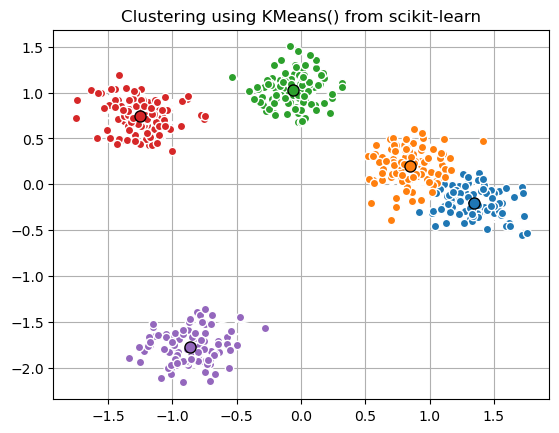